<a href="https://colab.research.google.com/github/jagadeeshmeesala/facial-recoginition-linear/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.mat to data.mat


In [ ]:
faces = loadmat('data.mat')['face']
# print(faces)
# print(faces.transpose([2,0,1]))

faces = faces.transpose([2,0,1]).reshape(600, 24, 21)

In [ ]:
neutral_faces = faces[0::3,:,:]
exp_faces = faces[1::3,:,:]
illum_faces = faces[2::3,:,:]

neutral_faces.shape

(200, 24, 21)

In [ ]:
X = np.concatenate([neutral_faces, exp_faces], axis=0)
X.shape

(400, 24, 21)

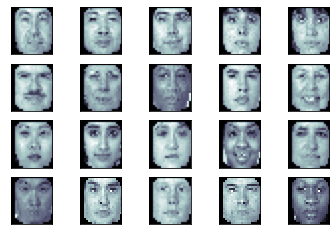

In [ ]:
fig, ax = plt.subplots(4, 5)
for i, axis in enumerate(ax.flat):
    axis.imshow(X[i, :, :], cmap='bone')
    axis.set(xticks=[], yticks=[])

In [ ]:
# zeros are for neutral faces and ones are for smiling faces
Y = np.concatenate([np.zeros(200), np.ones(200)])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    random_state=42,
    test_size=0.2,
    shuffle=True
)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]) 

In [ ]:
pca = PCA(n_components=10, whiten=False, random_state=42)
pca.fit(X_train)

X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

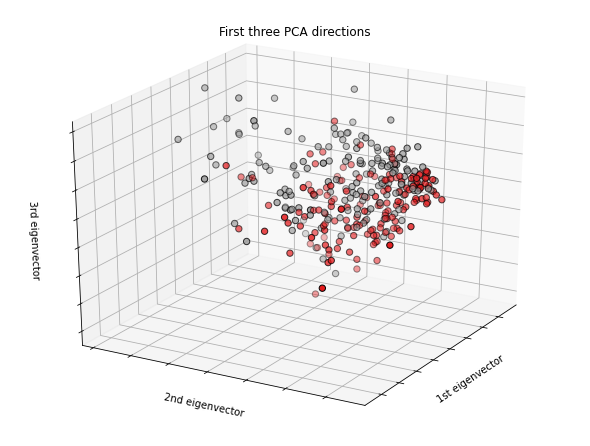

In [ ]:
def PCA_viz(X, Y):# this plot is used to show how the data is transformed after reducing it to 3d. Using 3 components results in worse accuracy.
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-155, azim=150)
    X_reduced = PCA(n_components=5).fit_transform(X)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
               cmap=plt.cm.Set1, edgecolor='k', s=40)
    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])
    plt.show()
    
PCA_viz(X_train, Y_train)